<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
titanic_csv = '/Users/JohanNg/DATA_SOURCE/titanic.csv'

df = pd.read_csv(titanic_csv, index_col = 'PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [3]:
#Fill age with mean of passenger grouped by gender and pclass

df['Age'] = df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [4]:
#Fill cabin with 0

df['Cabin'] = df['Cabin'].fillna(0)

In [5]:
#Fill Embarked with mode

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### Pclass and Survival

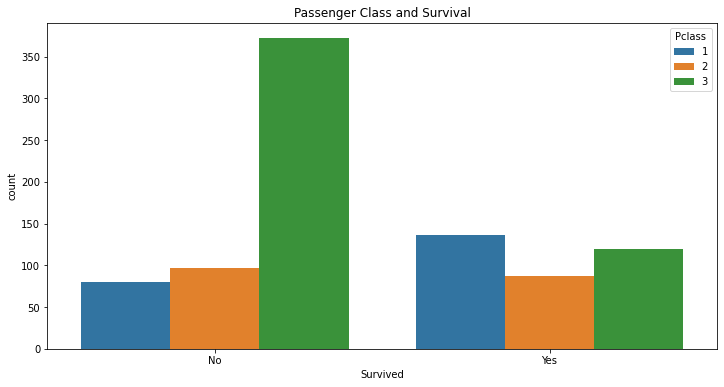

In [6]:
plt.figure(figsize = (12,6))
sns.countplot( x = 'Survived', hue = 'Pclass',data = df)
plt.title('Passenger Class and Survival')
plt.xticks([0,1],['No','Yes'])
plt.show()

### Sex and Survival

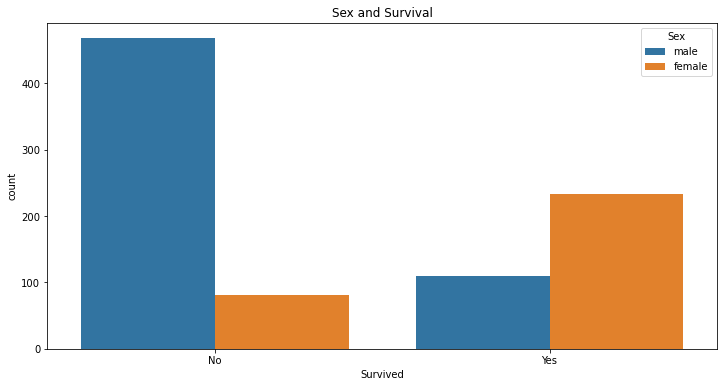

In [7]:
plt.figure(figsize = (12,6))
sns.countplot( x = 'Survived', hue = 'Sex',data = df)
plt.title('Sex and Survival')
plt.xticks([0,1],['No','Yes'])
plt.show()

### Parch and Survival

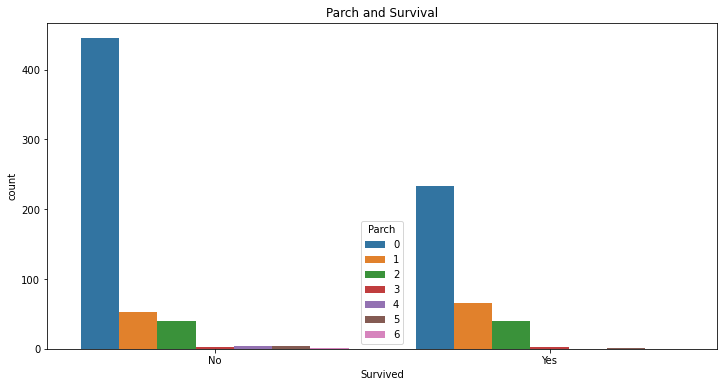

In [8]:
plt.figure(figsize = (12,6))
sns.countplot( x = 'Survived', hue = 'Parch',data = df)
plt.title('Parch and Survival')
plt.xticks([0,1],['No','Yes'])
plt.show()

### SibSp and Survival

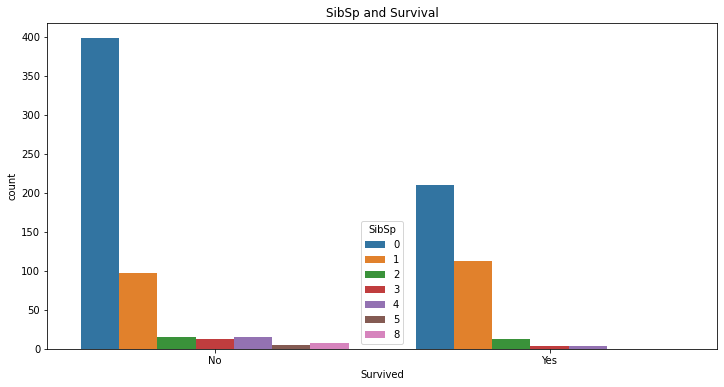

In [9]:
plt.figure(figsize = (12,6))
sns.countplot( x = 'Survived', hue = 'SibSp',data = df)
plt.title('SibSp and Survival')
plt.xticks([0,1],['No','Yes'])
plt.show()

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [10]:
# ANSWER
X = df[['Pclass','Parch']]
y = df['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [11]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [12]:
# ANSWER
# Create Model
reg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [13]:
# ANSWER
# Fit Model
reg.fit(X_train,y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [14]:
# ANSWER
reg.coef_

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [15]:
# ANSWER
reg.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [16]:
# ANSWER
print(set(zip(X, reg.coef_[0])))

{('Parch', 0.33432155514777917), ('Pclass', -0.9082421341469831)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [17]:
for col in zip(X_train.columns, reg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [18]:
# ANSWER
print(reg.score(X_train,y_train))

0.6924157303370787


What is the  `accuracy_score` for the test data?

In [19]:
# ANSWER
print(reg.score(X_test,y_test))

0.6536312849162011


What can we say aout this result?

ANSWER
- ...There is a 65% chance that our model is able to accurately predict whether or not a passenger will survive
- ...The model predicts better for the train data than the test data

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [20]:
# ANSWER
X2 = df[['Pclass','Parch','Age']]

In [21]:
# Build Model
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size = 0.2, random_state = 1)
reg2 = LogisticRegression()
# Fit Model
reg2.fit(X_train,y_train)

# Score
for col in zip(X_train.columns, reg2.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))

print(reg2.score(X_train,y_train))
print(reg2.score(X_test,y_test))

Pclass      -1.228430
Parch       +0.235529
Age         -0.041251
0.7162921348314607
0.664804469273743


In [22]:
df['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ... A lot of the data is imputed with the mean, so there might not be much variance
- ... Majority of the age is within the 20 - 40 years, so there might not be much variance as the model is modelled around these means  
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [23]:
# ANSWER
from sklearn.metrics import confusion_matrix


y_pred_class = reg2.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[87 19]
 [41 32]]


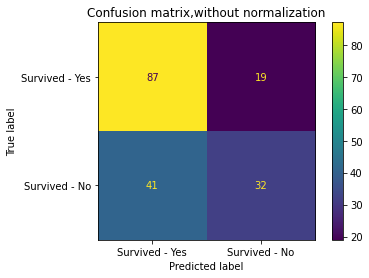

In [24]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Survived - Yes','Survived - No']
plot_confusion_matrix(reg2,X_test,y_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

Nb. Here is how `confusion_matrix` arranges its output:

In [25]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ... False Negatives, Type II error, where the passenger did not survive but the model incorrectly classified them as survived

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

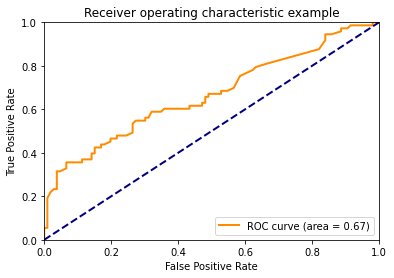

In [27]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg2.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [28]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [29]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [30]:
# ANSWER
# Set Feature Both Numerical, Categorical
X = titanic_with_dummies.drop(columns = ['Survived','Name','Ticket','Cabin']) 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
reg3 = LogisticRegression()
reg3.fit(X_train,y_train)


for col in zip(X_train.columns, reg3.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))

print(reg3.score(X_train,y_train))
print(reg3.score(X_test,y_test))

Age         -0.041969
SibSp       -0.361651
Parch       +0.034107
Fare        +0.000997
Sex_female  +1.644918
Sex_male    -0.969221
Embarked_C  +0.368578
Embarked_Q  +0.330567
Embarked_S  -0.023449
Pclass_1    +1.377865
Pclass_2    +0.376717
Pclass_3    -1.078886
0.8188202247191011
0.8156424581005587


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


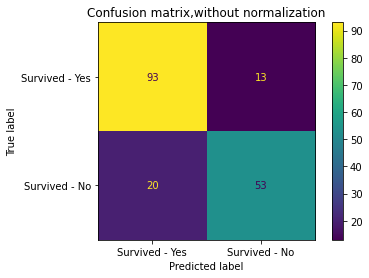

In [35]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Survived - Yes','Survived - No']
plot_confusion_matrix(reg3,X_test,y_test, normalize= None,display_labels = class_names)
plt.title('Confusion matrix,without normalization')
plt.show()

Plot the ROC curve for the new model:

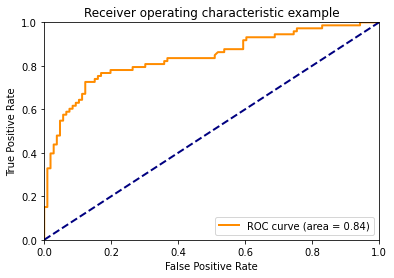

In [36]:
# ANSWER

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg3.predict_proba(X_test)[:,1]

#Flip the curve by 1 - preds

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

Not really

<function sklearn.metrics._ranking.auc(x, y)>

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



